In [9]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # import warning due to version problem
import re # import regular expression

warnings.filterwarnings('ignore')
#set the values and convert in to scientific values
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

In [10]:
#reading the data from data.csv file for below location 
loan_data = pd.read_csv('C:/HimanshuCapita/upgradaiml/LendingClubCaseStudy/LendingClubCaseStudy/loan.csv')
print(loan_data.shape) # check the shape of the data
print(loan_data.info()) # display the whole information about data
print(loan_data.dtypes) # check the datatypes

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [33]:
## Step1-Start ---> CLeansing of data
# First check the duplicate rows in dataset based on id column
print(loan_data.duplicated(subset= None, keep='first').count())
dup = loan_data[loan_data.duplicated(['id'])]
dup

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [34]:
# check empty rows
print('Number of empty Rows:')
print(loan_data.isnull().all(axis=1).sum())
# number of empty column
print('Number of empty columns: ')
print(loan_data.isnull().all(axis=0).sum())

Number of empty Rows:
0
Number of empty columns: 
54


In [18]:
# Data cleaning column wise 
# Lets find column wise null values
loan_data.isnull().sum()
# Second data is percentage wise null values in each column


id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [35]:
# percentage of missing values in each column
print(round(loan_data.isnull().sum()/len(loan_data.index), 2)*100)
# then removing the column having more than 90% missing values
missing_columns = loan_data.columns[100 * (loan_data.isnull().sum()/len(loan_data.index)) > 90 ]
print(missing_columns)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.00
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64
Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_re

In [36]:
# drop the column which has more than 90% null values 
loan_data = loan_data.drop(missing_columns, axis =1)
print(loan_data.shape)

(39717, 55)


In [25]:
# summarise number of missing values again
100*(loan_data.isnull().sum()/len(loan_data.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [27]:
# If you analyze the above result set we found two column have 34 % and 64 % missing values
# check few entries in both columns
loan_data.loc[:,['desc','mths_since_last_delinq']].head()



,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [37]:
# I have checked and verified that desc column contain the comments enter by customer while applying the laon
# mths_since_last_delinq - The above contain value related to past dues they are past due on their financial obligation(s), such as a loan, credit card, or bond payments
# So we dont require the above columns. So we need to drop above columns

loan_data = loan_data.drop(['desc','mths_since_last_delinq'], axis =1 )
print(loan_data)


            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000          4975.00   
1      1077430    1314167       2500         2500          2500.00   
2      1077175    1313524       2400         2400          2400.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500          1075.00   
39713    90665      90607       8500         8500           875.00   
39714    90395      90390       5000         5000          1325.00   
39715    90376      89243       5000         5000           650.00   
39716    87023      86999       7500         7500           800.00   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B        B2  ...          171.62   

In [39]:
# Again summarizes the missing value to check
100 * (loan_data.isnull().sum()/len(loan_data.index))

id                           0.00
member_id                    0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_title                    6.19
emp_length                   2.71
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
issue_d                      0.00
loan_status                  0.00
pymnt_plan                   0.00
url                          0.00
purpose                      0.00
title                        0.03
zip_code                     0.00
addr_state                   0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
open_acc                     0.00
pub_rec                      0.00
revol_bal     

In [41]:
# missing values in rows
loan_data.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [42]:
# another check where rows have morethan 5 missing value 
len(loan_data[loan_data.isnull().sum(axis=1) > 5].index)

0

In [43]:
# So check all data is clean and formatted 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [47]:
# When I observed above value and found that int_rate must have float 64 datatype. So convert int_rate in to fload data type
loan_data ['int_rate'] = loan_data['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [48]:
# checking the data types
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [50]:
# also, lets extract the numeric part from the variable employment length

# first, first drop the missing values from the column (otherwise the regex code below throws error)
import re
loan_data = loan_data[~loan_data['emp_length'].isnull()]

# using regular expression to extract numeric values from the string

loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: pd.to_numeric(x))
print(loan_data['emp_length'])

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38642, dtype: int64


In [13]:
# again looking in to the data types
loan_data.dtypes
#End of data cleaning 

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [14]:
## Data Analysis
# A- The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. 
# B-There are broadly three types of variables –
    #1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 
    #2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 
    #3. Customer behavior variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).
#C- Now, the customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

#D-The ones marked 'current' are neither fully paid not defaulted, so get rid of the current loans. Also, tag the other two values as 0 or 1 to make your analysis simple and clean.
#First Remove the customer behaviour column from the data set

customer_behaviour =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
# drop the column from the data_table which is not required now for analysis purpose
df = loan_data.drop(customer_behaviour, axis =1)
print(df)


            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000          4975.00   
1      1077430    1314167       2500         2500          2500.00   
2      1077175    1313524       2400         2400          2400.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500          1075.00   
39713    90665      90607       8500         8500           875.00   
39714    90395      90390       5000         5000          1325.00   
39715    90376      89243       5000         5000           650.00   
39716    87023      86999       7500         7500           800.00   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%     

In [15]:
# Lets remove the another variables which is not useful
df = df.drop(['title','url','zip_code','addr_state'],axis =1)

In [16]:
# Lets have a look at the target variable for loan_status column which contain the value like Fully Paid, Charged Off,
# and Current
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
# When analysis for above resultset we have found Full Paid has maximum values , Current has neither paid or nor defaulters. So 
# get rid of the particular value . Now two value Fully Paid and Charged Off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))
# Summarize the values of loan status
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [18]:
#Univariate Analysis
# default rate
round(np.mean(df['loan_status']), 2)

# The default rate is 14%


0.15

<AxesSubplot:xlabel='loan_amnt'>

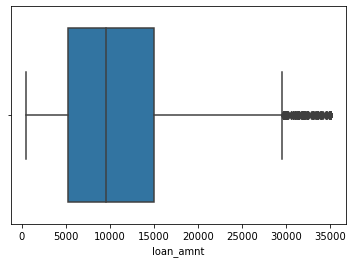

In [19]:
#box plot for the loan_amnt
sns.boxplot(df['loan_amnt'])

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

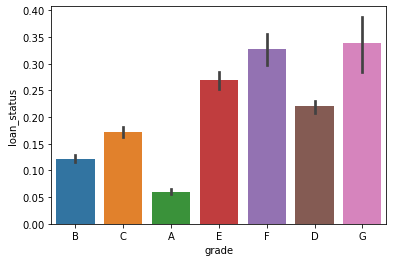

In [20]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y = 'loan_status', data =df)


In [21]:
#lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

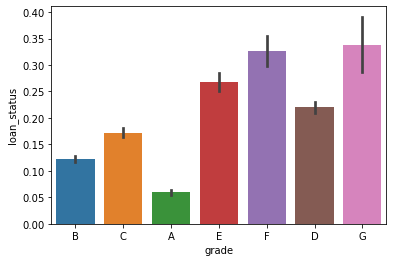

In [22]:
# compare default rates across grade of loan and show the treand A to G increases at Default rate
plot_cat('grade')

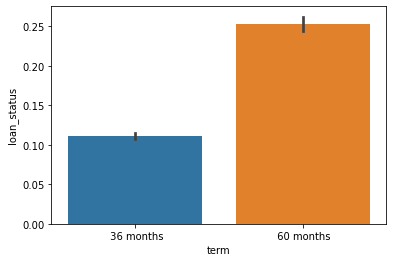

In [23]:
# term: 60 months loans default more than 36 months loans 
plot_cat('term')

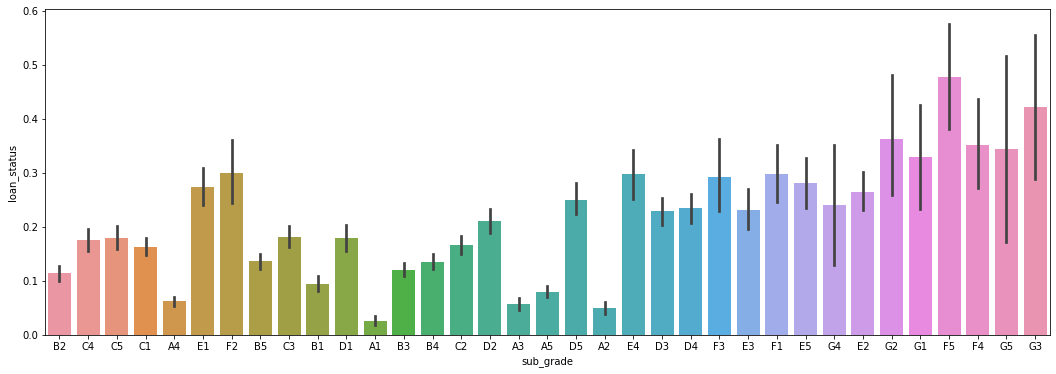

In [24]:
# sub category evaluation of 16,6
plt.figure(figsize=(18,6))
plot_cat('sub_grade')

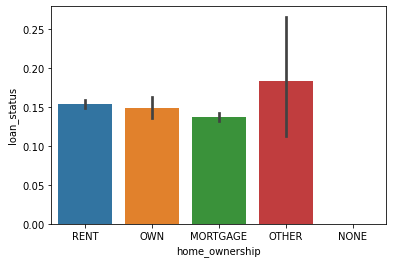

In [25]:
# Next plotting against the home ownership  and data show its almost same plotting of graph except other
plot_cat('home_ownership')

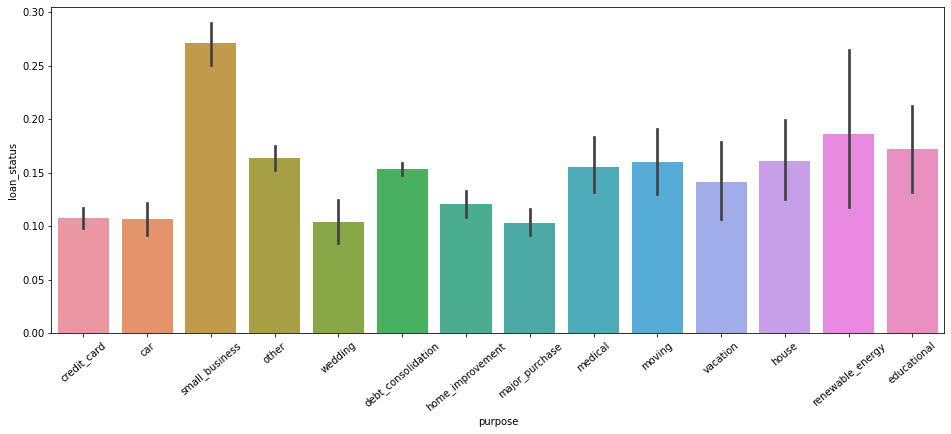

In [26]:
# purpose: 1- Most default business - small business, and then renewable energy and education
plt.figure(figsize=(16, 6))
# Rotating the labels on X-axis to avoid overlapping
plt.xticks(rotation=40) 
plot_cat('purpose')

In [27]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [28]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [29]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [30]:
# number of loans grant every year
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

In [31]:
# numbers of loan across month
df.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

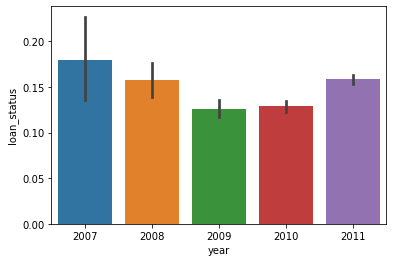

In [32]:
# compare default rates across years
# default rates has suddenly increased in 2011, its reducing 2008 till 2010
plot_cat('year')

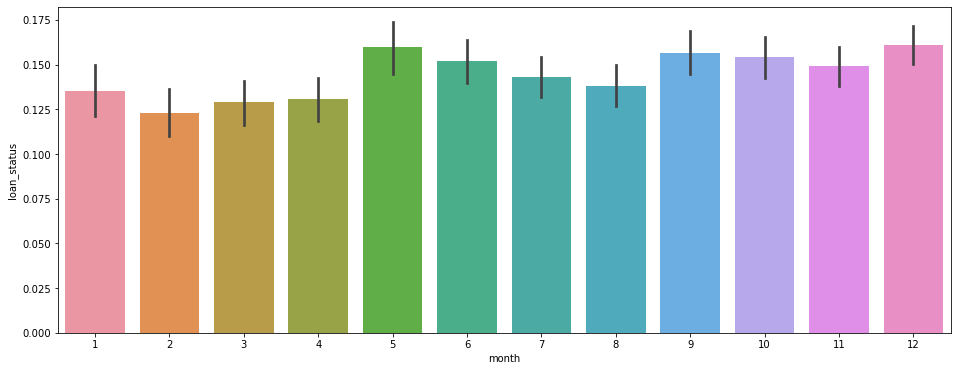

In [33]:
# default rates across months : no variations across months
plt.figure(figsize=(16,6))
plot_cat('month')

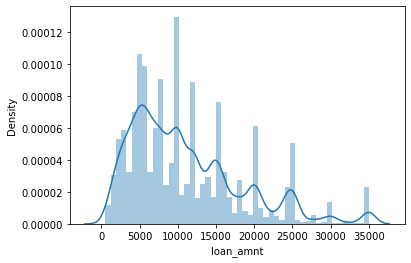

In [35]:
#loan amount : median loan amount
sns.distplot(df['loan_amnt'])
plt.show()

In [36]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [37]:
df['loan_amnt'].value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

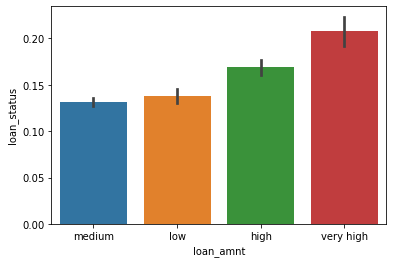

In [38]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
plot_cat('loan_amnt')

In [39]:
# let's also convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

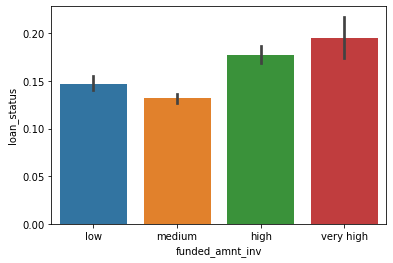

In [40]:
# funded amount invested
plot_cat('funded_amnt_inv')

In [43]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

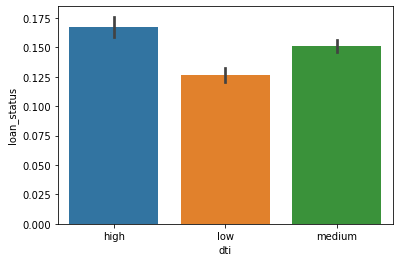

In [44]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot_cat('dti')

In [45]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

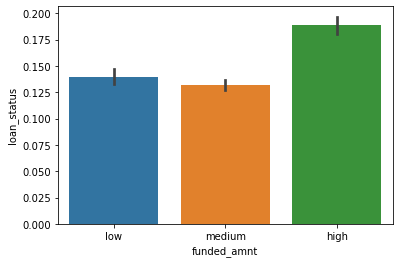

In [46]:
plot_cat('funded_amnt')

In [47]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

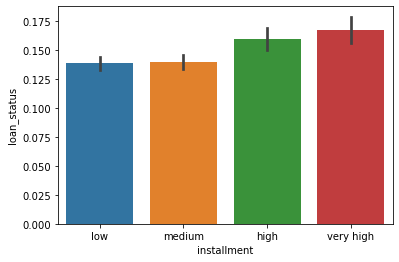

In [48]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_cat('installment')

In [50]:
## Segmented Univariate Analysis

#We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

#In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

#Let's again have a look at the default rates across the purpose of the loan.

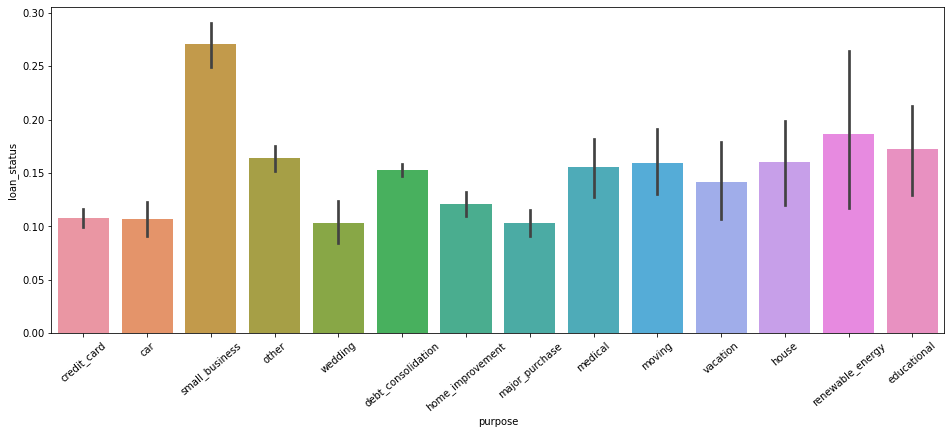

In [51]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=40)
plot_cat('purpose')

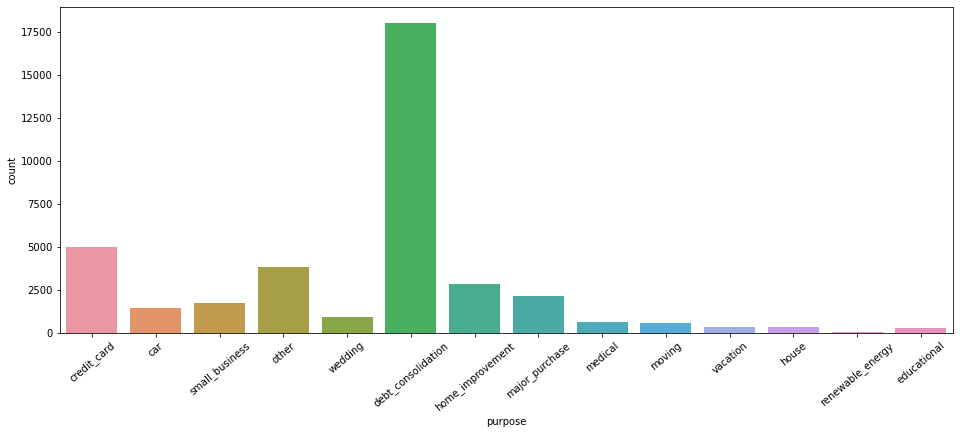

In [52]:
#In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a 
# variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
plt.xticks(rotation=40)
sns.countplot(x='purpose', data=df)
plt.show()

In [53]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

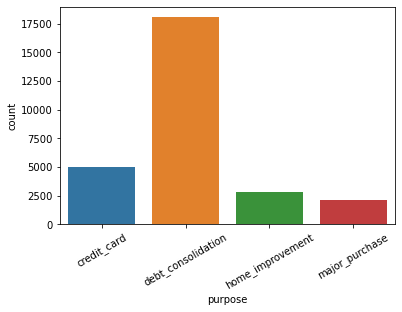

In [54]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.xticks(rotation=30)
plt.show()

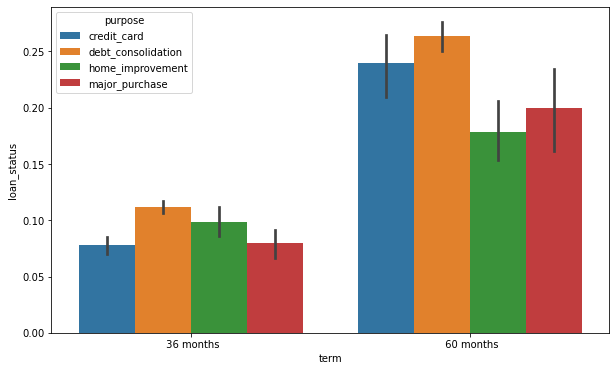

In [55]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

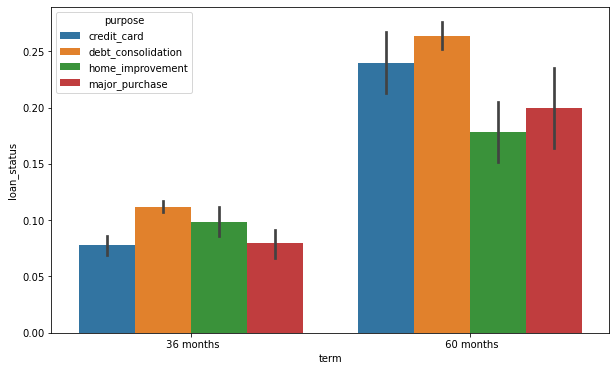

In [58]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

    
plot_segmented('term')

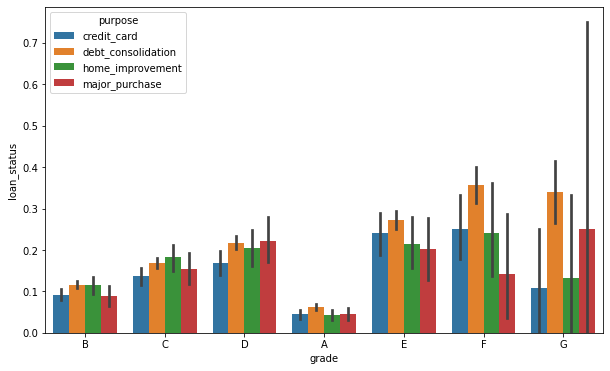

In [59]:
# grade of loan
plot_segmented('grade')

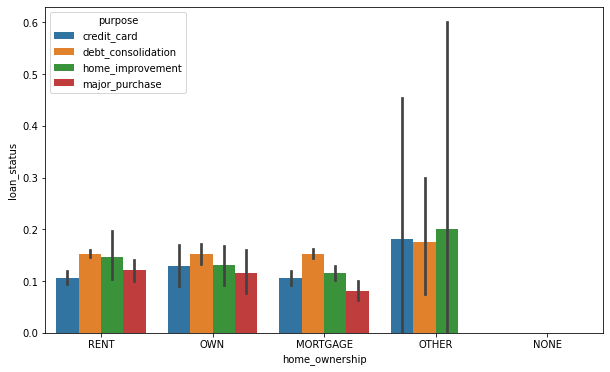

In [60]:
# home ownership
plot_segmented('home_ownership')

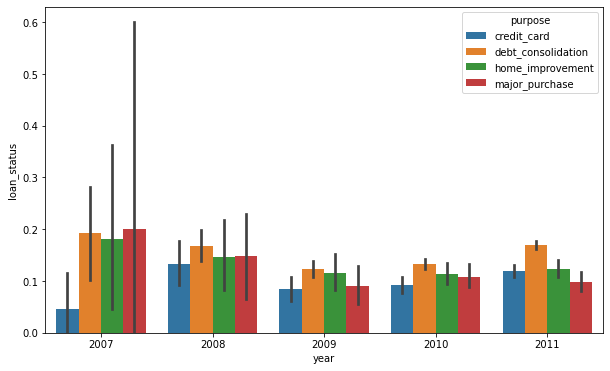

In [61]:
# year
plot_segmented('year')

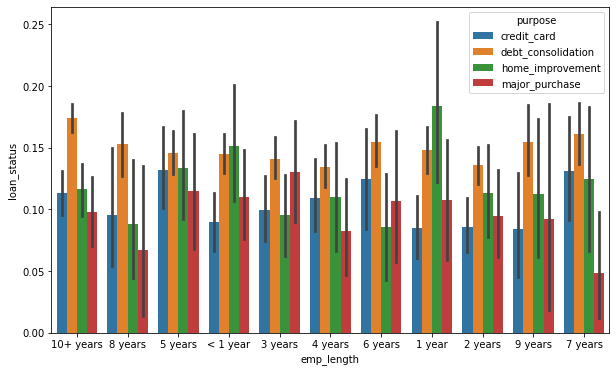

In [62]:
# emp_length
plot_segmented('emp_length')

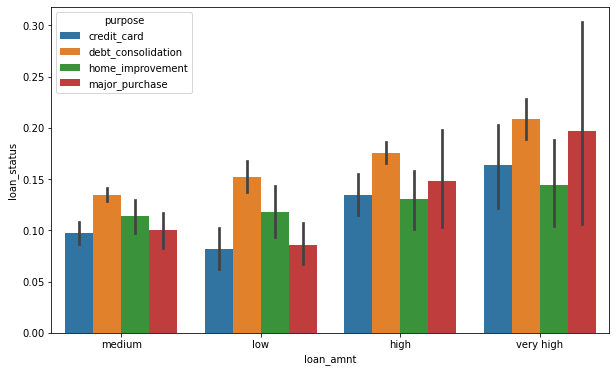

In [69]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt')

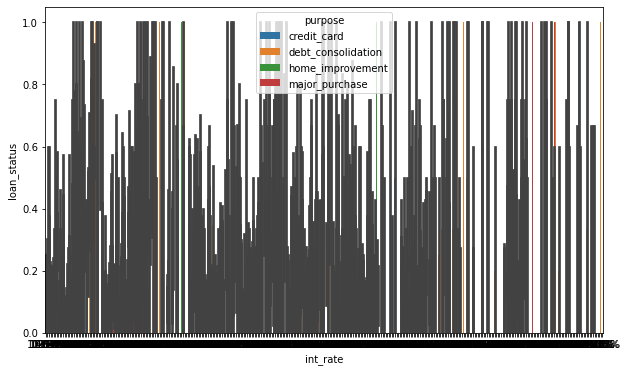

In [70]:
# interest rate
plot_segmented('int_rate')

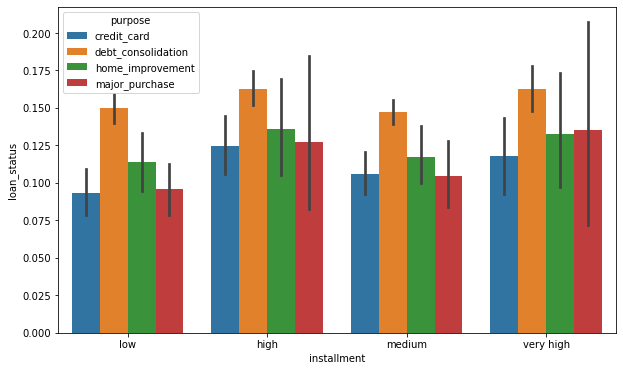

In [71]:
# installment
plot_segmented('installment')

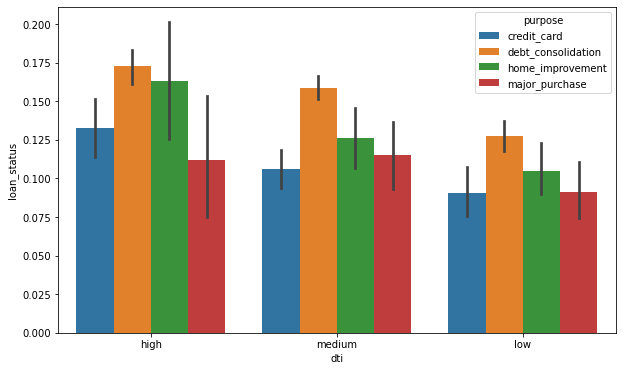

In [72]:
# debt to income ratio
plot_segmented('dti')

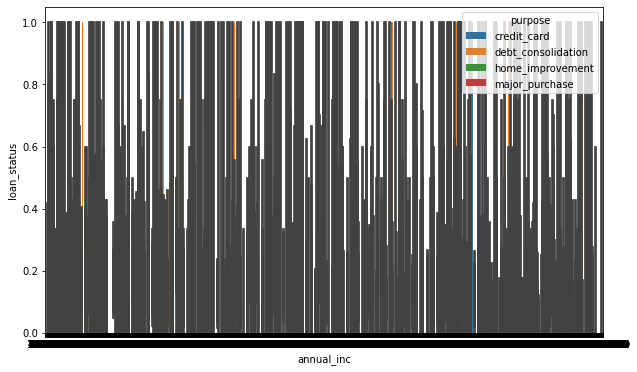

In [73]:
# annual income
plot_segmented('annual_inc')

In [ ]:
# End of analysis - Himanshu Pandey and Megha Murthy analysis